# Colour - HDRI - Examples: Variance Minimization Light Probe Sampling

Through this example, lights will be extracted from HDRIs using Viriyothai (2009) variance minimization light probe sampling algorithm.

<div class="alert alert-warning">
The current implementation is not entirely vectorised nor optimised thus slow.
</div>

In [1]:
import os
from pprint import pprint

import colour

from colour_hdri import (
    ROOT_RESOURCES_EXAMPLES,
    light_probe_sampling_variance_minimization_Viriyothai2009,
)
from colour_hdri.sampling.variance_minimization import (
    find_regions_variance_minimization_Viriyothai2009,
    highlight_regions_variance_minimization,
)

ROOT_RESOURCES = os.path.join(ROOT_RESOURCES_EXAMPLES, "radiance")

colour.plotting.colour_style()

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.10.8 (main, Oct 12 2022, 09:32:59) [Clang 14.0.0           *
*   (clang-1400.0.29.102)]                                                    *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.4.1                                                        *
*       colour-hdri : v0.1.8-156-g0bc7147                                     *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.22.1                                                      *
*       matplotlib : 3.6.1                                                    *
*       numpy : 1.23.4                  

## Regions

/Users/kelsolaar/Library/Caches/pypoetry/virtualenvs/colour-hdri-bkoxrqd3-py3.10/lib/python3.10/site-packages/colour/utilities/array.py:2203: RuntimeWarning: invalid value encountered in double_scalars
  a_ci.append(np.sum(axis * a) // a_s)


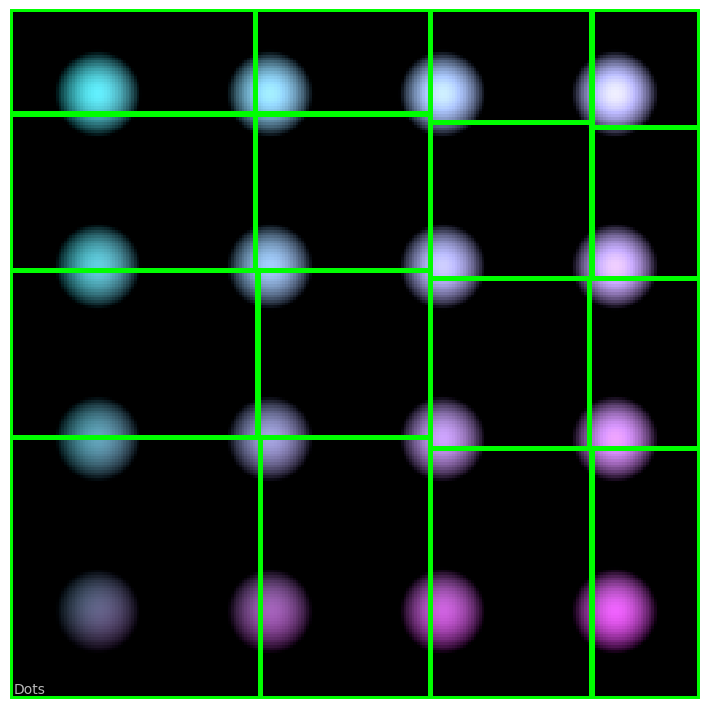

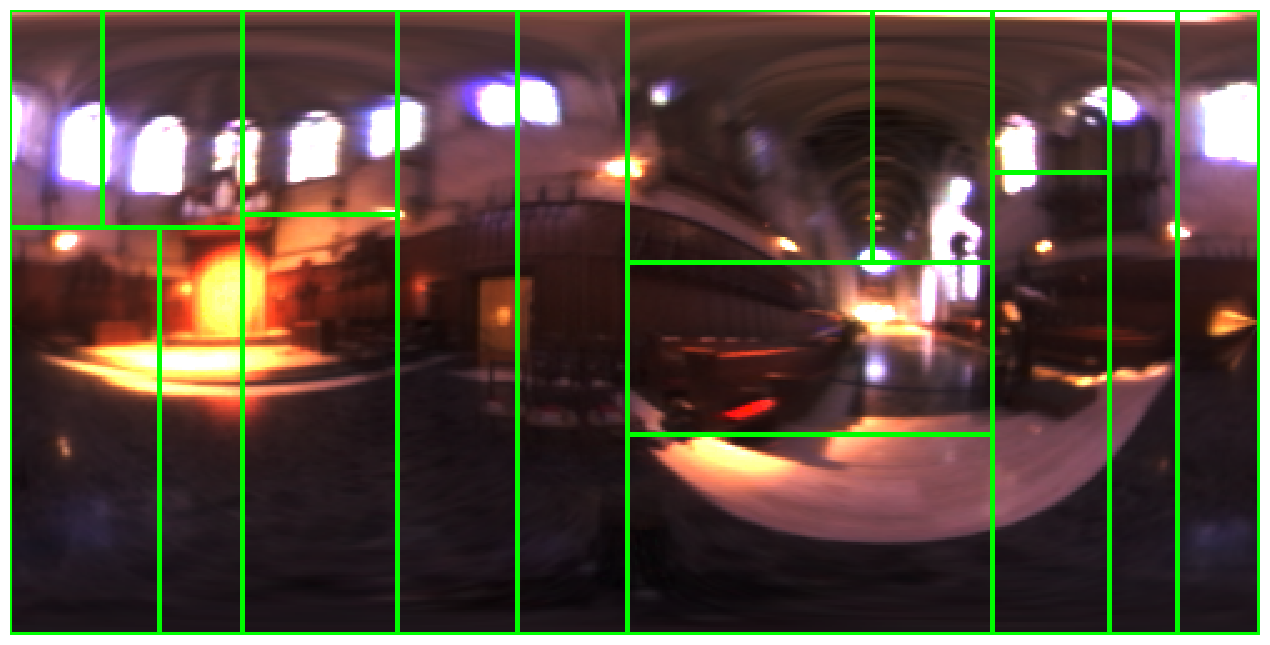

In [2]:
HDRI_IMAGE1 = colour.read_image(os.path.join(ROOT_RESOURCES, "Dots.exr"))

HDRI_IMAGE2 = colour.read_image(os.path.join(ROOT_RESOURCES, "Grace_Cathedral.hdr"))

Y1 = colour.RGB_luminance(
    HDRI_IMAGE1,
    colour.models.RGB_COLOURSPACE_sRGB.primaries,
    colour.models.RGB_COLOURSPACE_sRGB.whitepoint,
)
regions1 = find_regions_variance_minimization_Viriyothai2009(Y1)

Y2 = colour.RGB_luminance(
    HDRI_IMAGE2,
    colour.models.RGB_COLOURSPACE_sRGB.primaries,
    colour.models.RGB_COLOURSPACE_sRGB.whitepoint,
)
regions2 = find_regions_variance_minimization_Viriyothai2009(Y2)

colour.plotting.plot_image(
    colour.cctf_encoding(
        highlight_regions_variance_minimization(HDRI_IMAGE1, regions1)
    ),
    text_kwargs={"text": "Dots"},
)

colour.plotting.plot_image(
    colour.cctf_encoding(
        highlight_regions_variance_minimization(HDRI_IMAGE2, regions2)
    ),
    text_kwargs={"test": "Grace Cathedral"},
);

## Lights

In [3]:
print("Dots - 16 Lights")
pprint(light_probe_sampling_variance_minimization_Viriyothai2009(HDRI_IMAGE1, 16))

print("\n")

print("Grace Cathedral - 32 Lights")
pprint(light_probe_sampling_variance_minimization_Viriyothai2009(HDRI_IMAGE2, 32))

Dots - 16 Lights


/Users/kelsolaar/Library/Caches/pypoetry/virtualenvs/colour-hdri-bkoxrqd3-py3.10/lib/python3.10/site-packages/colour/utilities/array.py:2203: RuntimeWarning: invalid value encountered in double_scalars
  a_ci.append(np.sum(axis * a) // a_s)


[Light_Specification(uv=array([ 0.16015625,  0.11328125]), colour=array([  40.65992016,  226.11660475,  266.78098774]), index=array([29, 41])),
 Light_Specification(uv=array([ 0.15625   ,  0.32421875]), colour=array([  30.73776919,  130.37145448,  161.1077342 ]), index=array([83, 40])),
 Light_Specification(uv=array([ 0.4296875 ,  0.11328125]), colour=array([  98.10281688,  201.29676312,  299.4054991 ]), index=array([ 29, 110])),
 Light_Specification(uv=array([ 0.4296875,  0.3203125]), colour=array([  74.89445847,  117.00525796,  191.89859456]), index=array([ 82, 110])),
 Light_Specification(uv=array([ 0.16796875,  0.484375  ]), colour=array([  42.24291545,  125.58142895,  167.82099468]), index=array([124,  43])),
 Light_Specification(uv=array([ 0.43359375,  0.484375  ]), colour=array([  90.15780473,  102.82409275,  192.97436064]), index=array([124, 111])),
 Light_Specification(uv=array([ 0.18359375,  0.7421875 ]), colour=array([  82.1725328 ,   97.55175847,  179.72394174]), index=arra

/Users/kelsolaar/Library/Caches/pypoetry/virtualenvs/colour-hdri-bkoxrqd3-py3.10/lib/python3.10/site-packages/colour/utilities/verbose.py:262: ColourWarning: 32 lights requested, 25 will be effectively computed!
  warn(*args, **kwargs)


[Light_Specification(uv=array([ 0.016,  0.196]), colour=array([ 1737.94824219,  1340.39746094,  2991.25292969]), index=array([49,  8])),
 Light_Specification(uv=array([ 0.06,  0.22]), colour=array([  4932.79736328,   4677.75732422,  10582.44873047]), index=array([55, 30])),
 Light_Specification(uv=array([ 0.1  ,  0.232]), colour=array([ 3534.47290039,  2863.27978516,  4447.44165039]), index=array([58, 50])),
 Light_Specification(uv=array([ 0.136,  0.232]), colour=array([ 2676.72607422,  1950.38256836,  2374.09399414]), index=array([58, 68])),
 Light_Specification(uv=array([ 0.06 ,  0.412]), colour=array([ 1578.71356201,   656.52148438,   349.82165527]), index=array([103,  30])),
 Light_Specification(uv=array([ 0.096,  0.58 ]), colour=array([ 2525.62277222,  1030.9206543 ,   255.17736816]), index=array([145,  48])),
 Light_Specification(uv=array([ 0.166,  0.46 ]), colour=array([ 7535.69287109,  1403.37402344,   147.95703125]), index=array([115,  83])),
 Light_Specification(uv=array([ 0.